<a href="https://colab.research.google.com/github/vinuka03/machine-learning-CourseWork/blob/Model/Models/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('bank-additional-full.csv', sep=';')

print(data.head())

# Check for data types and missing values
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
# Count the "unknown" in each column
unknown_counts = data.apply(lambda col: col[col == "unknown"].count())

# Display the counts of "unknown" values
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()

# Display the counts of null values
print(null_counts)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

data = data.drop_duplicates()


Number of duplicate rows: 12


In [ ]:
# Filter out rows with "unknown" in the loan and housing columns
data = data[(data['loan'] != 'unknown') & (data['housing'] != 'unknown')]

# Verify the number of remaining rows
print(f"Remaining rows after filtering: {len(data)}")

Remaining rows after filtering: 40186


In [ ]:
# Drop  'duration' snd 'default' column
data = data.drop(columns=['duration','default'])

# Check the remaining columns
print(f"Remaining columns: {data.columns}")

Remaining columns: Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [ ]:
# Check unique values in 'pdays' before transformation
print(data['pdays'].unique())


[999   6   4   3   5   1   0  10   7   9  11   2   8  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [ ]:
# Convert 'pdays' to a binary column: 1 if previously contacted, 0 if not
data['pdays'] = (data['pdays'] != 999).astype(int)

print(data['pdays'].value_counts())

# Check unique values in 'pdays' after transformation
print(data['pdays'].unique())


pdays
0    38705
1     1481
Name: count, dtype: int64
[0 1]


<ipython-input-86-edcec1f4e9a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


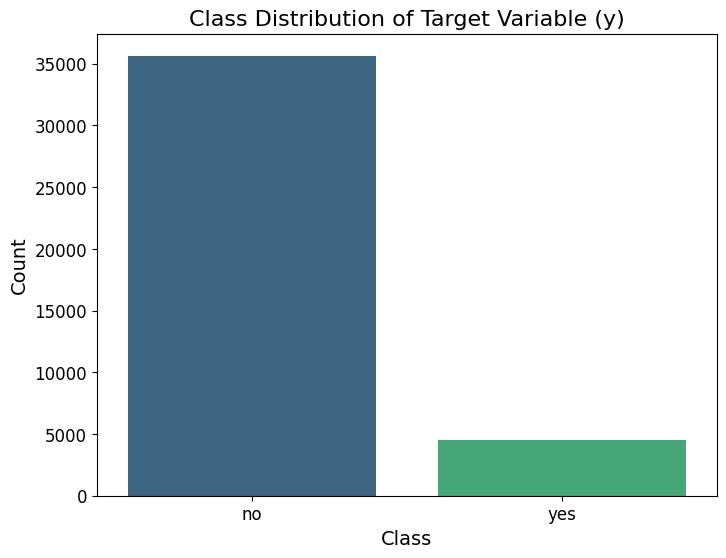

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution of the target variable (y)
class_counts = data['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of Target Variable (y)", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

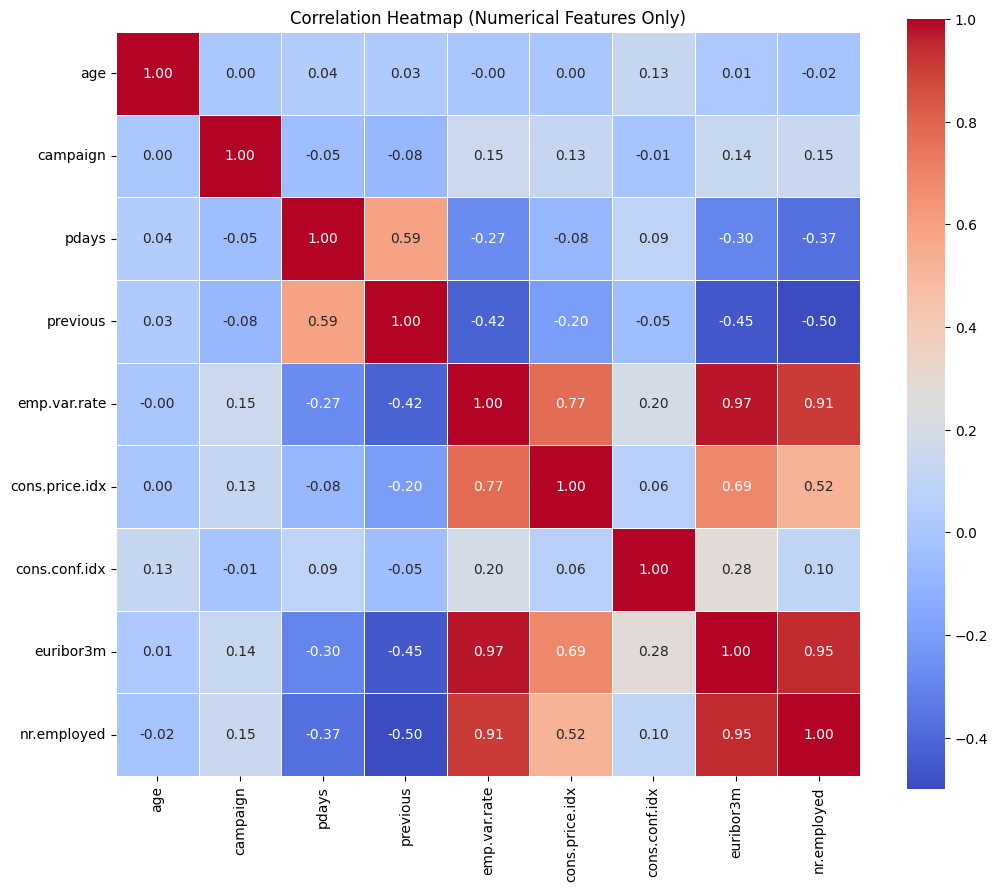

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()


In [ ]:
# Drop the 'emp.var.rate' column from the data
data = data.drop(columns=['emp.var.rate'])



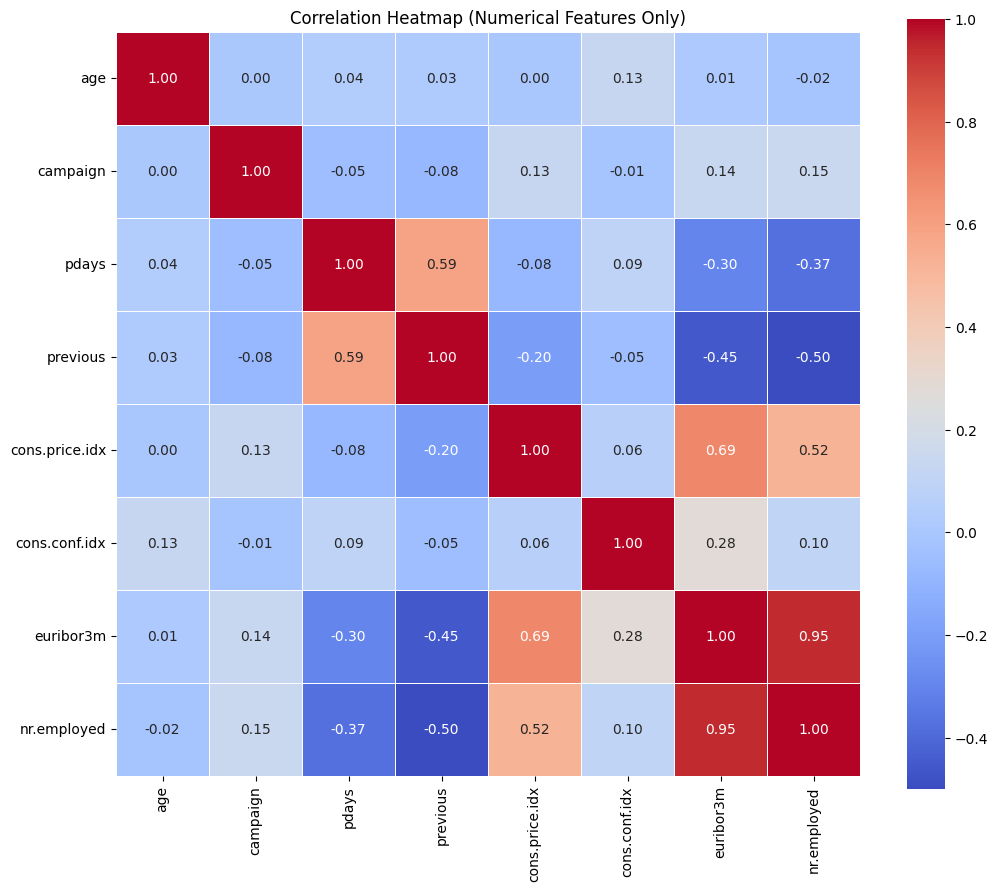

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

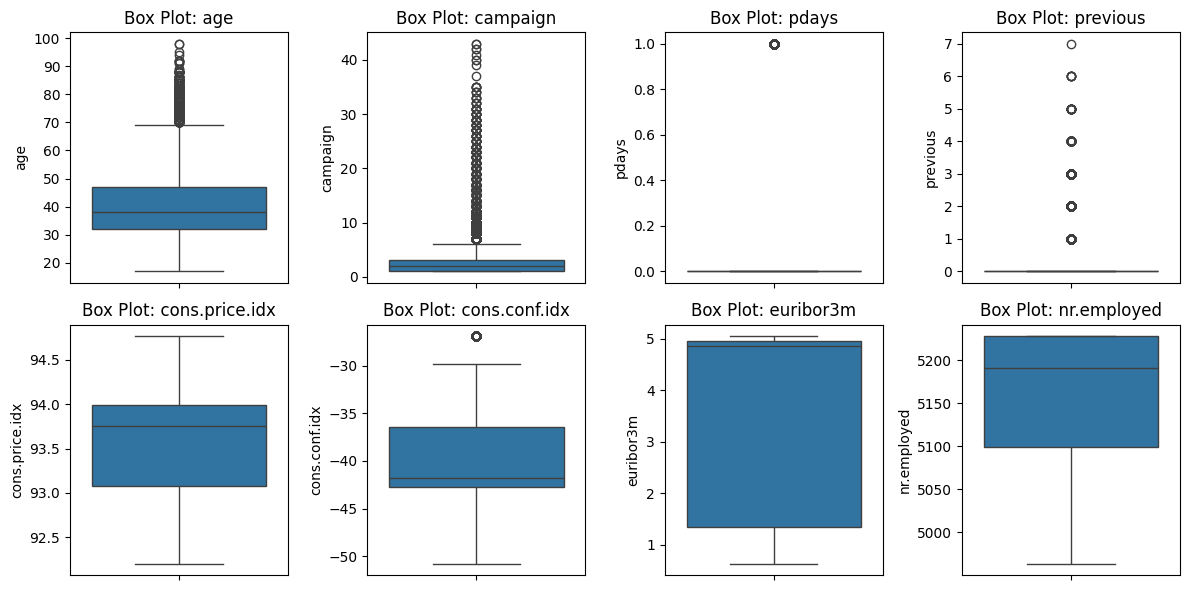

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#  Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns


# Calculate the number of rows and columns needed for subplots based on the number of numeric columns
num_cols = len(numeric_cols)
ncols = 4
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  # Ensure enough rows to fit all columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i + 1)  # Adjust the number of subplots dynamically
    sns.boxplot(data[col])
    plt.title(f'Box Plot: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# List of columns to cap outliers
columns_to_cap = ['cons.conf.idx', 'campaign']  # Replace with your column names

# Calculate IQR-based bounds for the selected columns
Q1_selected = data[columns_to_cap].quantile(0.25)
Q3_selected = data[columns_to_cap].quantile(0.75)
IQR_selected = Q3_selected - Q1_selected

# Calculate lower and upper bounds
lower_bound_selected = Q1_selected - 1.5 * IQR_selected
upper_bound_selected = Q3_selected + 1.5 * IQR_selected

# Cap the outliers for the selected columns
for col in columns_to_cap:
    data[col] = np.where(data[col] < lower_bound_selected[col], lower_bound_selected[col], data[col])
    data[col] = np.where(data[col] > upper_bound_selected[col], upper_bound_selected[col], data[col])


In [ ]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame called 'data'

# List of categorical columns
categorical_cols = ['job', 'marital', 'education',  'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols )

data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})

# Verify the encoded data
print("Shape of Encoded Data:", data_encoded.shape)
print(data_encoded.head())

# Check for non-numeric columns
print(data_encoded.dtypes)


Shape of Encoded Data: (40186, 57)
   age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  euribor3m  \
0   56       1.0      0         0          93.994          -36.4      4.857   
1   57       1.0      0         0          93.994          -36.4      4.857   
2   37       1.0      0         0          93.994          -36.4      4.857   
3   40       1.0      0         0          93.994          -36.4      4.857   
4   56       1.0      0         0          93.994          -36.4      4.857   

   nr.employed  y  job_admin.  ...  month_oct  month_sep  day_of_week_fri  \
0       5191.0  0       False  ...      False      False            False   
1       5191.0  0       False  ...      False      False            False   
2       5191.0  0       False  ...      False      False            False   
3       5191.0  0        True  ...      False      False            False   
4       5191.0  0       False  ...      False      False            False   

   day_of_week_mon  day_of_

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to scale (excluding the target 'y')
columns_to_scale = data_encoded.drop('y', axis=1).columns

# Apply scaling
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Verify the scaled data
print("Scaled Data (first few rows):")
print(data_encoded.head())


Scaled Data (first few rows):
        age  campaign     pdays  previous  cons.price.idx  cons.conf.idx  \
0  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
1  1.628768  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
2 -0.290317  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
3 -0.002455  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
4  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   

   euribor3m  nr.employed  y  job_admin.  ...  month_oct  month_sep  \
0   0.712969     0.331603  0   -0.582925  ...  -0.132855  -0.118231   
1   0.712969     0.331603  0   -0.582925  ...  -0.132855  -0.118231   
2   0.712969     0.331603  0   -0.582925  ...  -0.132855  -0.118231   
3   0.712969     0.331603  0    1.715487  ...  -0.132855  -0.118231   
4   0.712969     0.331603  0   -0.582925  ...  -0.132855  -0.118231   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0        -0.4

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the shape of the resampled data
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

# Combine the resampled features and target back into a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['y'] = y_resampled

# Optionally, check the first few rows of the resampled data
print(data_resampled.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original dataset shape: y
0    35654
1     4532
Name: count, dtype: int64
Resampled dataset shape: y
0    35654
1    35654
Name: count, dtype: int64
        age  campaign     pdays  previous  cons.price.idx  cons.conf.idx  \
0  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
1  1.628768  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
2 -0.290317  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
3 -0.002455  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
4  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   

   euribor3m  nr.employed  job_admin.  job_blue-collar  ...  month_sep  \
0   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
1   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
2   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
3   0.712969     0.331603    1.715487        -0.537707  ...  -0.118231   
4   0.712969     0.33160

In [ ]:
# Remove duplicate rows
data_resampled_no_duplicates = data_resampled.drop_duplicates()

# Verify the shape of the dataset after removing duplicates
print("Shape of Data after removing duplicates:", data_resampled_no_duplicates.shape)

# Optionally, check the first few rows of the cleaned dataset
print(data_resampled_no_duplicates.head())


Shape of Data after removing duplicates: (69100, 57)
        age  campaign     pdays  previous  cons.price.idx  cons.conf.idx  \
0  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
1  1.628768  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
2 -0.290317  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
3 -0.002455  -0.82241 -0.195611 -0.349545        0.726005       0.887848   
4  1.532814  -0.82241 -0.195611 -0.349545        0.726005       0.887848   

   euribor3m  nr.employed  job_admin.  job_blue-collar  ...  month_sep  \
0   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
1   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
2   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   
3   0.712969     0.331603    1.715487        -0.537707  ...  -0.118231   
4   0.712969     0.331603   -0.582925        -0.537707  ...  -0.118231   

   day_of_week_fri  day_of_week_mon  day_of_w

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming data_resampled_no_duplicates is the final dataset after SMOTE and removing duplicates
# Separate features (X) and target variable (y)
X = data_resampled_no_duplicates.drop('y', axis=1)
y = data_resampled_no_duplicates['y']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons and ReLU activation
    model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Get training and testing accuracy
train_accuracy = history.history['accuracy'][-1]  # Training accuracy at the last epoch
test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Testing accuracy on the test set

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Thresholding the probability for binary classification

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print training and testing accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy[1]:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      6729
           1       0.85      0.90      0.87      7091

    accuracy                           0.86     13820
   macro avg       0.86      0.86      0.86     13820
weighted avg       0.86      0.86      0.86     13820

Confusion Matrix:
[[5587 1142]
 [ 744 6347]]
ROC AUC Score: 0.8627
Training Accuracy: 0.8880
Testing Accuracy: 0.8635
